In [1]:
#Repositary link - https://www.kaggle.com/datasets/surajjha101/cuisine-rating/code 

In [2]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Importing dataset and basic understanding of data
df = pd.read_csv('C:\\Users\\manal\\OneDrive\\Desktop\\Assignments UE\\Python\\Cuisine_rating.csv')
df.head()

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User ID         200 non-null    int64  
 1   Area code       200 non-null    int64  
 2   Location        200 non-null    object 
 3   Gender          200 non-null    object 
 4   YOB             200 non-null    int64  
 5   Marital Status  200 non-null    object 
 6   Activity        200 non-null    object 
 7   Budget          200 non-null    int64  
 8   Cuisines        200 non-null    object 
 9   Alcohol         200 non-null    object 
 10  Smoker          200 non-null    object 
 11  Food Rating     200 non-null    int64  
 12  Service Rating  200 non-null    int64  
 13  Overall Rating  200 non-null    float64
 14  Often A S       200 non-null    object 
dtypes: float64(1), int64(6), object(8)
memory usage: 23.6+ KB


In [5]:
df.describe()

,User ID,Area code,YOB,Budget,Food Rating,Service Rating,Overall Rating
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,141.060000,1984.830000,3.815000,3.220000,3.230000,3.225000
std,57.879185,26.130257,16.809339,1.056578,1.411226,1.526022,1.079445
min,1.000000,101.000000,1955.000000,1.000000,1.000000,1.000000,1.000000
25%,50.750000,123.000000,1971.000000,3.000000,2.000000,2.000000,2.500000
50%,100.500000,135.000000,1987.000000,4.000000,3.000000,3.000000,3.000000
75%,150.250000,158.000000,2000.000000,5.000000,5.000000,5.000000,4.000000
max,200.000000,199.000000,2009.000000,5.000000,5.000000,5.000000,5.000000


In [6]:
df.shape

(200, 15)

In [7]:
df.isnull().sum()

User ID           0
Area code         0
Location          0
Gender            0
YOB               0
Marital Status    0
Activity          0
Budget            0
Cuisines          0
Alcohol           0
Smoker            0
Food Rating       0
Service Rating    0
Overall Rating    0
Often A S         0
dtype: int64

In [8]:
#As there are no missing values, we will move on with Descriptive Statistics

print(df['Budget'].agg(['sum','mean']))

print(df['Overall Rating'].agg(['sum','mean','count']))

sum     763.000
mean      3.815
Name: Budget, dtype: float64
sum      645.000
mean       3.225
count    200.000
Name: Overall Rating, dtype: float64


In [9]:
#Outlier Detection and Treatment

df.corr()

C:\Users\manal\AppData\Local\Temp\ipykernel_7740\1652932562.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,User ID,Area code,YOB,Budget,Food Rating,Service Rating,Overall Rating
User ID,1.000000,0.463977,0.006203,-0.010148,-0.003691,0.111227,0.076208
Area code,0.463977,1.000000,-0.065006,-0.046191,0.000458,-0.011942,-0.008142
YOB,0.006203,-0.065006,1.000000,-0.071383,0.040774,0.043651,0.057508
Budget,-0.010148,-0.046191,-0.071383,1.000000,0.057764,-0.135542,-0.058049
Food Rating,-0.003691,0.000458,0.040774,0.057764,1.000000,0.079056,0.709562
Service Rating,0.111227,-0.011942,0.043651,-0.135542,0.079056,1.000000,0.758532
Overall Rating,0.076208,-0.008142,0.057508,-0.058049,0.709562,0.758532,1.000000


C:\Users\manal\AppData\Local\Temp\ipykernel_7740\1622163119.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='cool',linewidth=1,linecolor='k')


<Axes: >

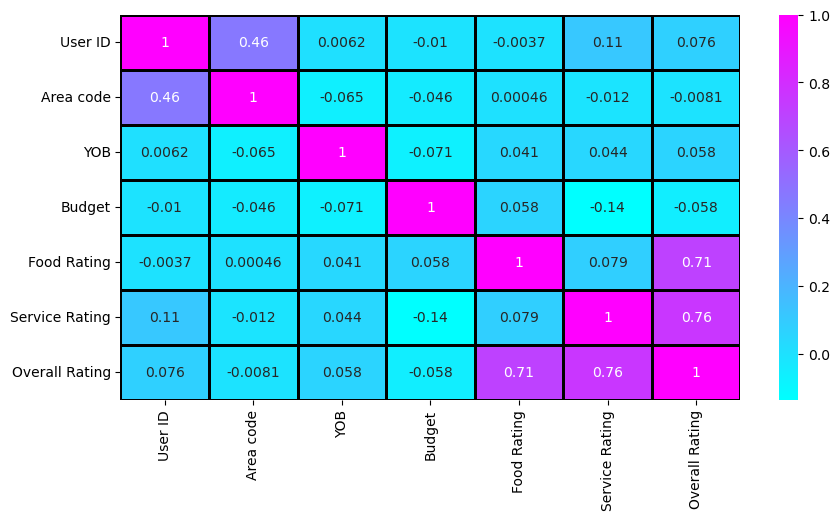

In [10]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='cool',linewidth=1,linecolor='k')

In [11]:
#There is no co-relation between the variables

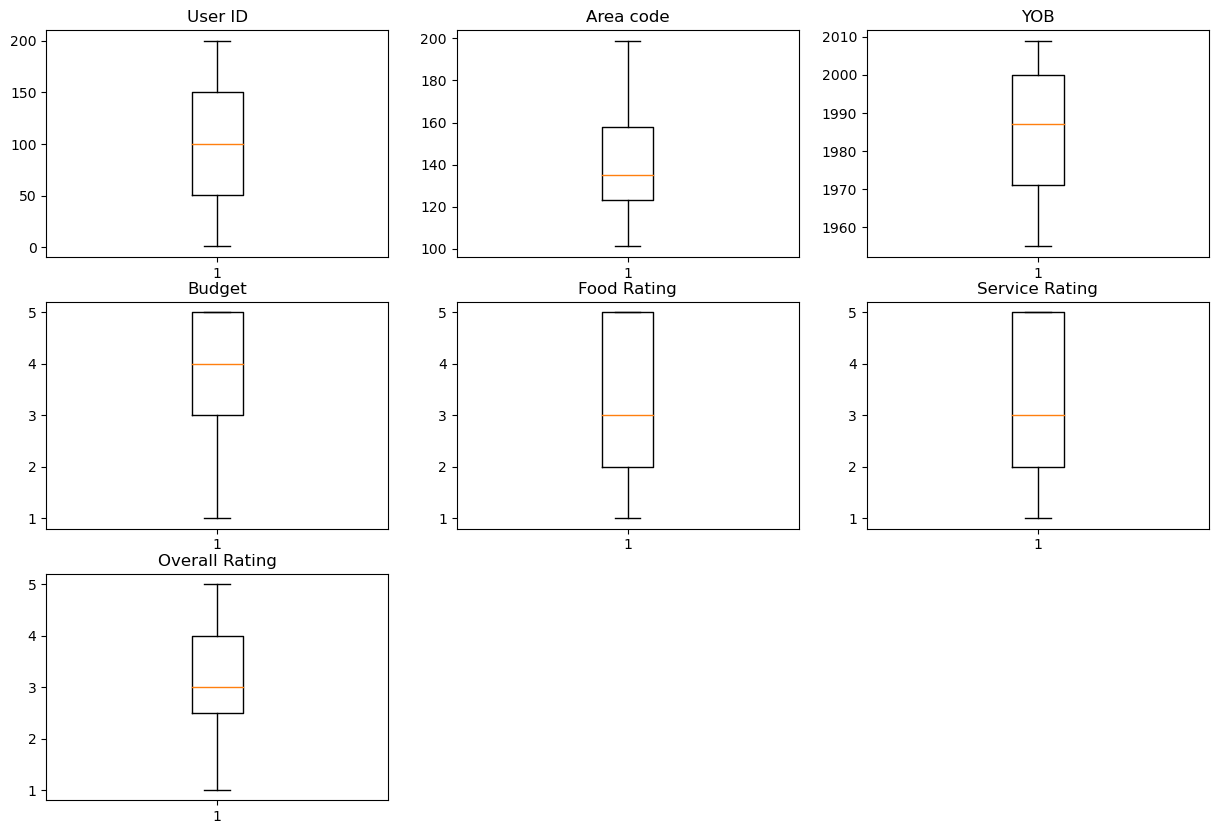

In [12]:
#Checking outliers using boxplot
sum=1
plt.figure(figsize=(15,10))
for i in ['User ID', 'Area code', 'YOB', 'Budget','Food Rating', 'Service Rating', 'Overall Rating']:
    plt.subplot(3,3,sum)
    plt.boxplot(df[i])
    sum=sum+1
    plt.title(i)

In [13]:
#Observation - we can see that there are no outliers but we can still drop the unnecessary columns such as 'area code' and 'location'

In [14]:
df.drop(columns=['Area code','Location'],inplace=True)

In [15]:
df.head()

,User ID,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


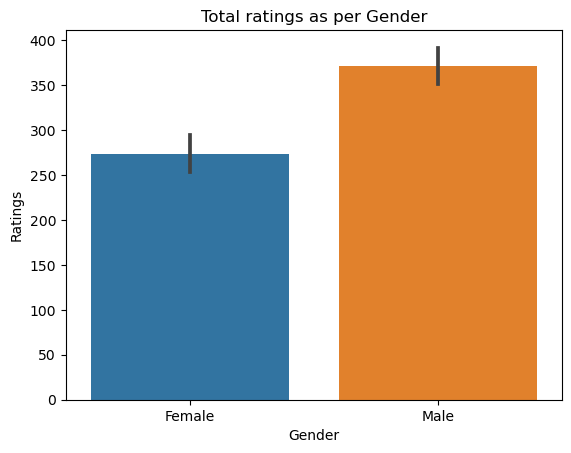

In [16]:
#Plotting visualization

sns.barplot(data=df, x='Gender', y='Overall Rating', estimator='sum')
plt.xlabel('Gender')
plt.ylabel('Ratings')
plt.title('Total ratings as per Gender')
plt.show()

In [17]:
#From above graph, we can say that Ratings from Male are more than Female.

In [18]:
df["Overall Rating"].value_counts().sort_values(ascending=False)

3.5    35
3.0    34
2.5    32
5.0    29
4.0    26
2.0    21
1.5    11
4.5     6
1.0     6
Name: Overall Rating, dtype: int64

Text(0, 0.5, 'counts')

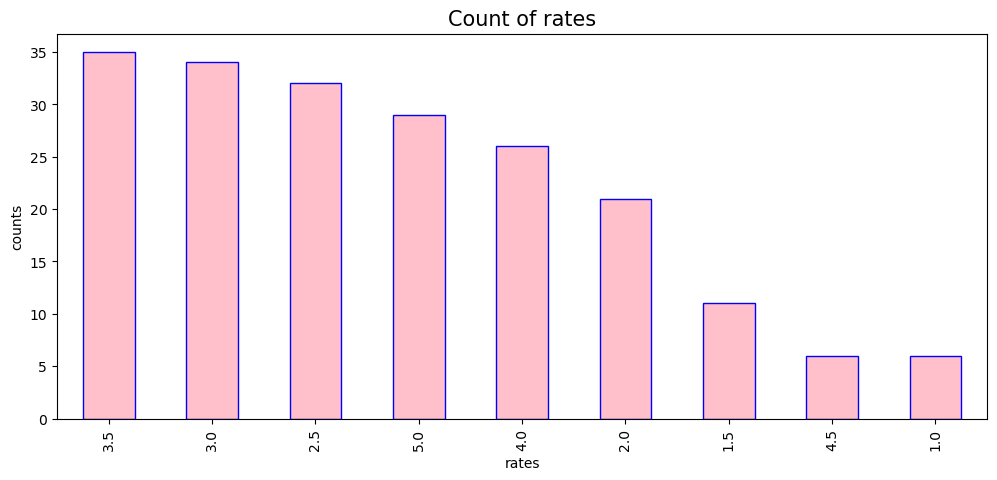

In [19]:
plt.figure(figsize=(12,5))
df["Overall Rating"].value_counts().sort_values(ascending=False).plot(kind="bar",fc="pink",ec="b")
plt.title("Count of rates",fontsize=15)
plt.xlabel("rates")
plt.ylabel("counts")

In [20]:
# We can see that most frequent ratings are 3.5 and 3.0 whereas least ratings are 1.0 and 4.5

In [21]:
#Creating a dataframe 

top = df.groupby('Cuisines')['Overall Rating'].sum().sort_values(ascending=False)

In [22]:
for i,j in top[:5].items():
    print(i,j)

Japanese 129.5
French 105.5
Filipino 103.5
Indian 101.5
Chinese 78.5


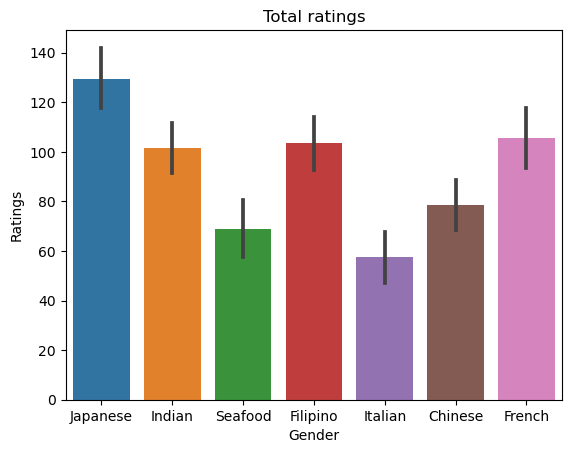

In [23]:
sns.barplot(data=df, x='Cuisines', y='Overall Rating', estimator='sum')
plt.xlabel('Gender')
plt.ylabel('Ratings')
plt.title('Total ratings')
plt.show()

In [24]:
#Japanese cuisine has the highest ratings

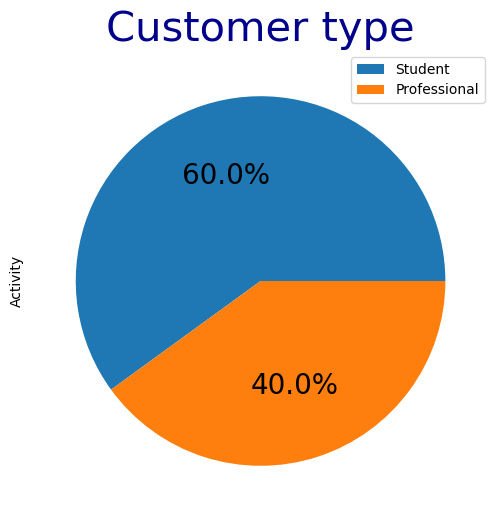

In [25]:
plt.figure(figsize=(10,6))

a=df.Activity.value_counts()
a.plot(kind='pie',fontsize=20, autopct='%1.1f%%', labels=None)

plt.legend(labels=a.index, loc='best')
plt.title('Customer type',fontsize=30,color='darkblue')
plt.show()

In [26]:
#From above fig, we can depict that 60% of our customers are Students.

## Impact on Further Analysis - After this analysis, restaurant will understand who are their target customers and using ratings what further changes should be made.